In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading the dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
# Optional: Scaling the data for better performance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [4]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

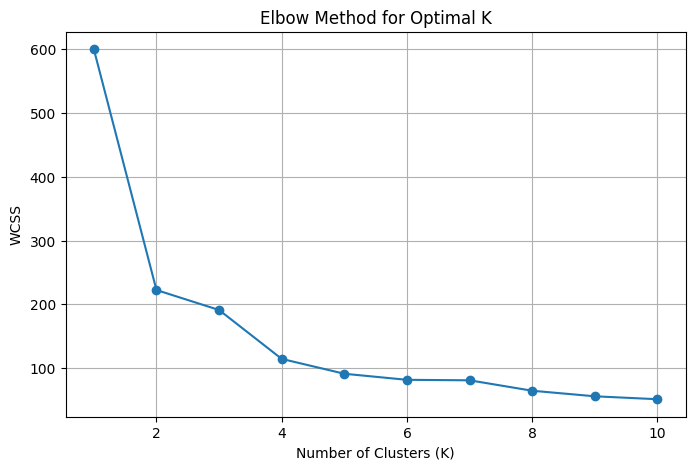

In [5]:
# Plotting the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [6]:

# From the elbow plot, let's assume the optimal K is 3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
pred_y = kmeans.fit_predict(scaled_data)

In [7]:

# Adding the cluster predictions to the original dataframe
data['Cluster'] = pred_y

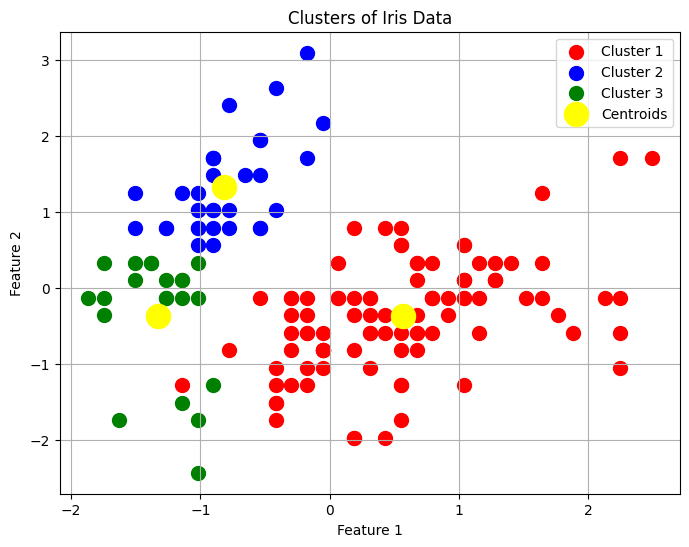

In [8]:
# Visualizing the clusters (using first two features for 2D plot)
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[pred_y == 0, 0], scaled_data[pred_y == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(scaled_data[pred_y == 1, 0], scaled_data[pred_y == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(scaled_data[pred_y == 2, 0], scaled_data[pred_y == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Iris Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()